In [2]:
import numpy as np
import pandas as pd
import risk_kit as rk
%matplotlib inline

<AxesSubplot:title={'center':'Change in 10Y Bond Prices with Interest Rates'}>

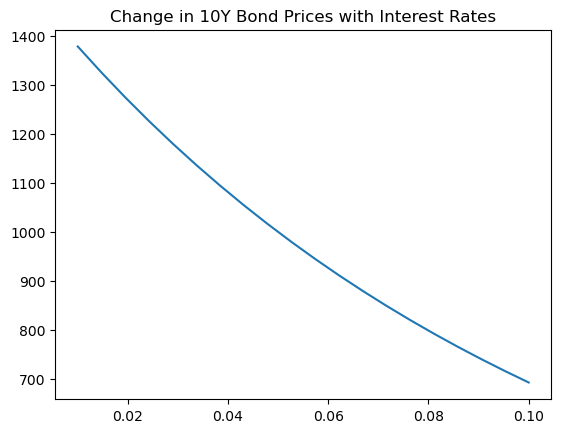

In [5]:
rates = np.linspace(.01, .10, num=20)
sb_portfolio = [rk.bond_price(10, 1000, .05, 1, r) for r in rates]
pd.DataFrame(data=sb_portfolio, index=rates).plot(title="Change in 10Y Bond Prices with Interest Rates", legend=False)

In [11]:
short_bond = rk.bond_cash_flows(10, 1000, .05, 1)
long_bond = rk.bond_cash_flows(20, 1000, .05, 1)
liabilities = pd.Series(data = [100000, 100000], index=[10, 12])
weight_sb = rk.match_durations(liabilities, short_bond, long_bond, 0.04)
weight_sb

0.48263092069478974

In [12]:
sb_price = rk.bond_price(10, 1000, .05, 1, 0.04)
lb_price = rk.bond_price(20, 1000, .05, 1, 0.04)
initial_capital = 130000
sb_investment= initial_capital*weight_sb
sb_investment

62742.01969032267

In [13]:
sb_cf = rk.bond_cash_flows(10, sb_investment, .05, 1)
sb_cf

1      3137.100985
2      3137.100985
3      3137.100985
4      3137.100985
5      3137.100985
6      3137.100985
7      3137.100985
8      3137.100985
9      3137.100985
10    65879.120675
dtype: float64

In [23]:
lb_cf = rk.bond_cash_flows(20, sb_investment, .05, 1)
lb_cf

1      3137.100985
2      3137.100985
3      3137.100985
4      3137.100985
5      3137.100985
6      3137.100985
7      3137.100985
8      3137.100985
9      3137.100985
10     3137.100985
11     3137.100985
12     3137.100985
13     3137.100985
14     3137.100985
15     3137.100985
16     3137.100985
17     3137.100985
18     3137.100985
19     3137.100985
20    65879.120675
dtype: float64

In [15]:
sb_fr = rk.funding_ratio(sb_cf, liabilities, 0.04)
sb_fr

1     0.024129
2     0.024129
3     0.024129
4     0.024129
5     0.024129
6     0.024129
7     0.024129
8     0.024129
9     0.024129
10    0.506700
dtype: float64

In [19]:
sb_terminal_value = rk.bond_price(10, sb_investment, .05, 1, .04)
sb_terminal_value

67830.95951726714

In [20]:
sb_fr = rk.funding_ratio(sb_terminal_value, liabilities, 0.04)
sb_fr

0.5217119120076134

In [21]:
lb_cf = rk.bond_cash_flows(20, sb_investment, .05, 1)
lb_terminal_value = rk.bond_price(20, sb_investment, .05, 1, .04)
lb_fr = rk.funding_ratio(lb_terminal_value, liabilities, 0.04)
lb_fr

0.5481540589946575

In [24]:
dm_assets=pd.concat([sb_investment*weight_sb*sb_cf/sb_price,sb_investment*(1-weight_sb)*lb_cf/lb_price])
dm_assets

1     8.786839e+04
2     8.786839e+04
3     8.786839e+04
4     8.786839e+04
5     8.786839e+04
6     8.786839e+04
7     8.786839e+04
8     8.786839e+04
9     8.786839e+04
10    1.845236e+06
1     8.964914e+04
2     8.964914e+04
3     8.964914e+04
4     8.964914e+04
5     8.964914e+04
6     8.964914e+04
7     8.964914e+04
8     8.964914e+04
9     8.964914e+04
10    8.964914e+04
11    8.964914e+04
12    8.964914e+04
13    8.964914e+04
14    8.964914e+04
15    8.964914e+04
16    8.964914e+04
17    8.964914e+04
18    8.964914e+04
19    8.964914e+04
20    1.882632e+06
dtype: float64

In [27]:
matched_duration = rk.macaulay_duration(dm_assets, 0.04)
matched_duration

10.960799385088393

In [28]:
md_terminal_value = rk.bond_price(matched_duration, initial_capital, .05, 1, .04)
md_terminal_value

141388.61972419373

In [29]:
md_fr = rk.funding_ratio(md_terminal_value, liabilities, 0.04)
md_fr

1.0874699054441206

In [32]:
lb2_cf = rk.bond_cash_flows(20, initial_capital, .05, 1)
lb2_cf

1       6500.0
2       6500.0
3       6500.0
4       6500.0
5       6500.0
6       6500.0
7       6500.0
8       6500.0
9       6500.0
10      6500.0
11      6500.0
12      6500.0
13      6500.0
14      6500.0
15      6500.0
16      6500.0
17      6500.0
18      6500.0
19      6500.0
20    136500.0
dtype: float64

In [33]:
sb2_cf = rk.bond_cash_flows(10, initial_capital, .05, 1)
sb2_cf

1       6500.0
2       6500.0
3       6500.0
4       6500.0
5       6500.0
6       6500.0
7       6500.0
8       6500.0
9       6500.0
10    136500.0
dtype: float64

In [34]:
sb2_terminal_value = rk.bond_price(10, initial_capital, .05, 1, .04)
sb2_fr = rk.funding_ratio(sb2_terminal_value, liabilities, 0.04)
sb2_fr

1.0809749016009231

In [35]:
lb2_terminal_value = rk.bond_price(20, initial_capital, .05, 1, .04)
lb2_fr = rk.funding_ratio(lb2_terminal_value, liabilities, 0.04)
lb2_fr

1.135762412829956

<AxesSubplot:title={'center':'Change in Funding Ratio'}>

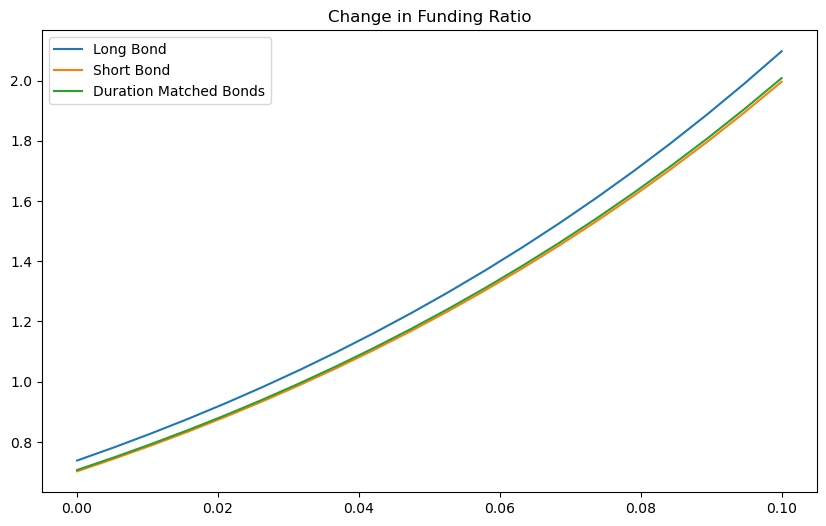

In [36]:
rates = np.linspace(0, .1, 20)

fr_change = pd.DataFrame({
    "Long Bond":[rk.funding_ratio(lb2_terminal_value, liabilities, r)for r in rates],
    "Short Bond":[rk.funding_ratio(sb2_terminal_value, liabilities, r)for r in rates],
    "Duration Matched Bonds":[rk.funding_ratio(md_terminal_value, liabilities, r)for r in rates]
}, index=rates)
fr_change.plot.line(title='Change in Funding Ratio', figsize=(10,6), legend=True)

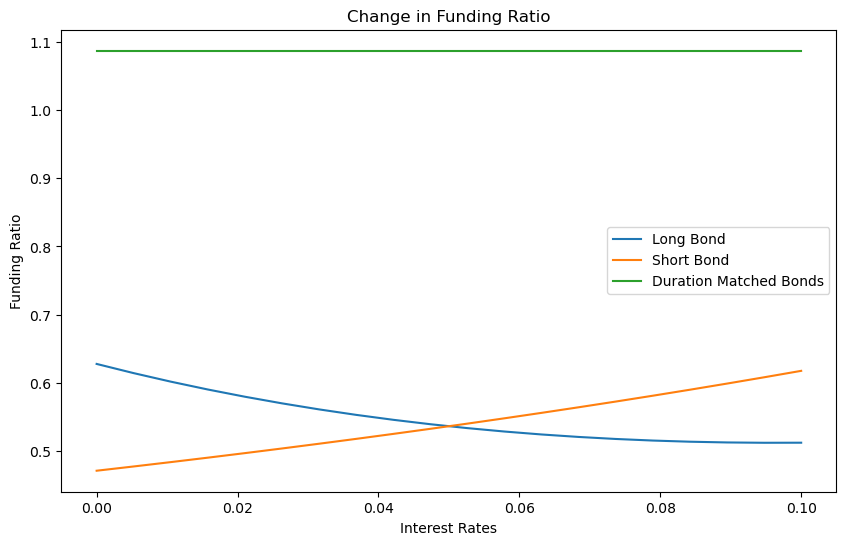

In [37]:
import numpy as np
import pandas as pd
import risk_kit as rk
import matplotlib.pyplot as plt

short_bond = rk.bond_cash_flows(10, 1000, .05, 1)
long_bond = rk.bond_cash_flows(20, 1000, .05, 1)
liabilities = pd.Series(data = [100000, 100000], index=[10, 12])
weight_sb = rk.match_durations(liabilities, short_bond, long_bond, 0.04)

sb_price = rk.bond_price(10, 1000, .05, 1, 0.04)
lb_price = rk.bond_price(20, 1000, .05, 1, 0.04)

initial_capital = 130000
sb_investment = initial_capital * weight_sb

sb_cf = rk.bond_cash_flows(10, sb_investment, .05, 1)
lb_cf = rk.bond_cash_flows(20, sb_investment, .05, 1)

sb_fr = rk.funding_ratio(sb_cf, liabilities, 0.04)
lb_fr = rk.funding_ratio(lb_cf, liabilities, 0.04)

sb_frs = []
lb_frs = []
for r in np.linspace(0, 0.1, 20):
    sb_terminal_value = rk.bond_price(10, sb_investment, .05, 1, r)
    lb_terminal_value = rk.bond_price(20, sb_investment, .05, 1, r)
    
    sb_fr = rk.funding_ratio(sb_terminal_value, liabilities, r)
    lb_fr = rk.funding_ratio(lb_terminal_value, liabilities, r)
    
    sb_frs.append(sb_fr)
    lb_frs.append(lb_fr)

dm_assets = pd.concat([sb_investment * weight_sb * sb_cf / sb_price,
                       sb_investment * (1 - weight_sb) * lb_cf / lb_price])
matched_duration = rk.macaulay_duration(dm_assets, 0.04)
md_terminal_value = rk.bond_price(matched_duration, initial_capital, .05, 1, .04)
md_fr = rk.funding_ratio(md_terminal_value, liabilities, 0.04)

md_frs = [md_fr] * 20

fr_change = pd.DataFrame({
    "Long Bond": lb_frs,
    "Short Bond": sb_frs,
    "Duration Matched Bonds": md_frs
}, index=np.linspace(0, 0.1, 20))

fr_change.plot.line(title='Change in Funding Ratio', figsize=(10, 6))
plt.xlabel('Interest Rates')
plt.ylabel('Funding Ratio')
plt.show()
